In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("results/experiment_1732920760_extra_stats.csv")
df.head()

,vocab_func,target_pct,accuracy_mean,accuracy_std,accuracy_se,f1_mean,f1_std,f1_se
0,pick_baseline_frequent,0.00,6.1,23.95,0.76,7.80,25.78,0.82
1,pick_baseline_frequent,0.10,11.8,32.28,1.02,21.25,36.12,1.14
2,pick_baseline_frequent,0.25,22.6,41.84,1.32,34.76,42.66,1.35
3,pick_baseline_frequent,0.50,42.7,49.49,1.56,53.30,46.02,1.46
4,pick_baseline_frequent,0.75,60.1,48.99,1.55,69.18,42.89,1.36


In [17]:
# Create a dictionary to hold the processed data for each method
methods = df["vocab_func"].unique()
target_pct_values = [0.1, 0.25, 0.5, 0.75]

# Initialize the LaTeX table structure
latex_table = """\\begin{table*}[htbp]
\\centering
\\small
\\caption{Performance Comparison for Various Methods with Different Target Percentages.}
\\resizebox{\\textwidth}{!}{
\\begin{tabular}{lcccccccc}
\\toprule
Model & \\multicolumn{2}{c}{10\\%} & \\multicolumn{2}{c}{25\\%} & \\multicolumn{2}{c}{50\\%} & \\multicolumn{2}{c}{75\\%} \\\\
\\cmidrule(lr){2-3} \\cmidrule(lr){4-5} \\cmidrule(lr){6-7} \\cmidrule(lr){8-9}
 & Acc (\\%) & F1 (\\%) & Acc (\\%) & F1 (\\%) & Acc (\\%) & F1 (\\%) & Acc (\\%) & F1 (\\%) \\\\
"""

# Loop through each method and extract the relevant data
for method in methods:
    row_data = [method.split("_")[-1].capitalize()]

    # Extract rows for the current method
    method_data = df[df["vocab_func"] == method]

    # Loop through each target_pct value and format the accuracy and f1 score with error
    for target in target_pct_values:
        target_data = method_data[method_data["target_pct"] == target]

        # Check if the data exists for the given target_pct
        if target_data.empty:
            # If data is missing, append placeholders
            row_data.append("N/A, N/A")
        else:
            target_data = target_data.iloc[0]
            accuracy = target_data["accuracy_mean"]
            accuracy_se = target_data["accuracy_se"]
            f1 = target_data["f1_mean"]
            f1_se = target_data["f1_se"]

            # Format the data as 'accuracy ± accuracy_se' with $$ for math mode
            accuracy_str = f"${accuracy:.2f} \\pm {accuracy_se:.2f}$"
            f1_str = f"${f1:.2f} \\pm {f1_se:.2f}$"

            # Append the formatted data to the row
            row_data.append(f"{accuracy_str} & {f1_str}")

    # Add the row to the LaTeX table
    latex_table += " & ".join(row_data) + " \\\\ \n"

# Close the LaTeX table
latex_table += """\\bottomrule
\\end{tabular}
}
\\end{table*}
"""

# Output the LaTeX table
print(latex_table)

\begin{table*}[htbp]
\centering
\small
\caption{Performance Comparison for Various Methods with Different Target Percentages.}
\resizebox{\textwidth}{!}{
\begin{tabular}{lcccccccc}
\toprule
Model & \multicolumn{2}{c}{10\%} & \multicolumn{2}{c}{25\%} & \multicolumn{2}{c}{50\%} & \multicolumn{2}{c}{75\%} \\
\cmidrule(lr){2-3} \cmidrule(lr){4-5} \cmidrule(lr){6-7} \cmidrule(lr){8-9}
 & Acc (\%) & F1 (\%) & Acc (\%) & F1 (\%) & Acc (\%) & F1 (\%) & Acc (\%) & F1 (\%) \\
Frequent & $11.80 \pm 1.02$ & $21.25 \pm 1.14$ & $22.60 \pm 1.32$ & $34.76 \pm 1.35$ & $42.70 \pm 1.56$ & $53.30 \pm 1.46$ & $60.10 \pm 1.55$ & $69.18 \pm 1.36$ \\ 
Random & $10.30 \pm 0.96$ & $16.03 \pm 1.06$ & $15.60 \pm 1.15$ & $25.09 \pm 1.23$ & $29.10 \pm 1.44$ & $45.80 \pm 1.38$ & $45.30 \pm 1.57$ & $63.42 \pm 1.33$ \\ 
Entropy & $16.20 \pm 1.17$ & $25.85 \pm 1.24$ & $28.80 \pm 1.43$ & $41.80 \pm 1.41$ & $49.70 \pm 1.58$ & $63.09 \pm 1.38$ & $69.10 \pm 1.46$ & $77.72 \pm 1.21$ \\ 
Divergence & $15.60 \pm 1.15$ & $25.0

<Figure size 3000x1500 with 0 Axes>

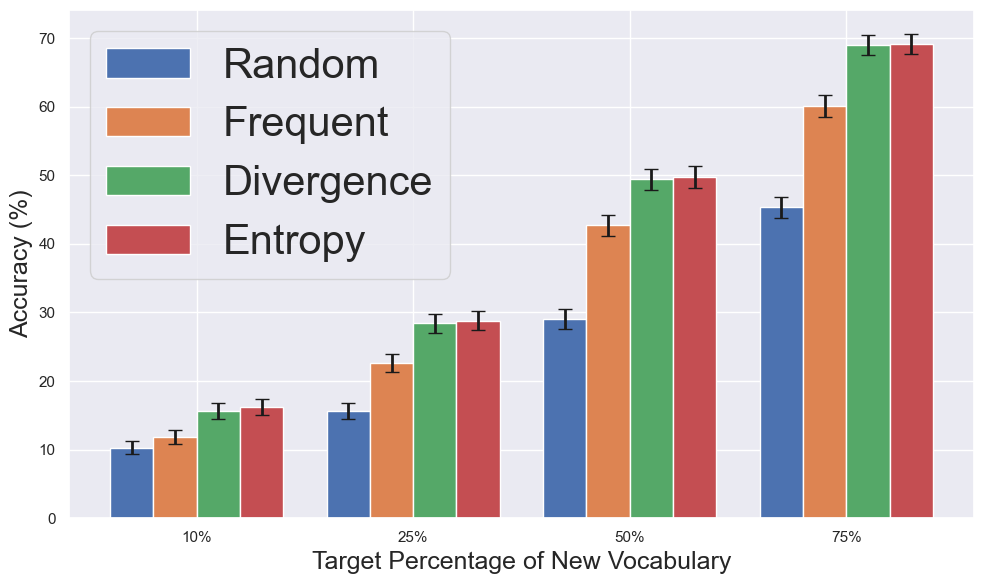

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data: Accuracy with error bars for each model and target percentage
models = ["Random", "Frequent", "Divergence", "Entropy"]
percentages = [10, 25, 50, 75]
sns.set_theme()

# Accuracy data (mean values from your table)
acc_data = {
    "Random": [10.30, 15.60, 29.10, 45.30],
    "Frequent": [11.80, 22.60, 42.70, 60.10],
    "Divergence": [15.60, 28.40, 49.40, 69.00],
    "Entropy": [16.20, 28.80, 49.70, 69.10],
}

# Standard deviations for accuracy (from your table)
acc_error = {
    "Random": [0.96, 1.15, 1.44, 1.57],
    "Frequent": [1.02, 1.32, 1.56, 1.55],
    "Divergence": [1.15, 1.43, 1.58, 1.46],
    "Entropy": [1.17, 1.43, 1.58, 1.46],
}

# Plotting Accuracies with Error Bars
plt.figure(figsize=(12, 6), dpi=250)
x = np.arange(len(percentages))  # The x positions of the bars
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))

# Plot for accuracy with error bars
for i, model in enumerate(models):
    ax.bar(
        x + i * width,
        acc_data[model],
        width,
        yerr=acc_error[model],
        label=model,
        capsize=5,
        error_kw={"elinewidth": 2, "capsize": 5},
    )

ax.set_xlabel("Target Percentage of New Vocabulary", fontsize=18)
ax.set_ylabel("Accuracy (%)", fontsize=18)
# ax.set_title("Performance Comparison of Vocabulary Picking Methods (Accuracy)")
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels([f"{p}%" for p in percentages])
ax.legend(fontsize=30)

plt.tight_layout()
plt.savefig("assets/no_prior_accuracy.png")
plt.show()

In [27]:
df2 = pd.read_csv("results/experiment_1732920760.csv")
df2.head()

,n,prior_vocab,vocab_func,target_pct,accuracy,f1,avg_vocab_len
0,1000,none,pick_baseline_frequent,0.00,6.1,7.80,0.00
1,1000,none,pick_baseline_frequent,0.10,11.8,21.25,6.96
2,1000,none,pick_baseline_frequent,0.25,22.6,34.76,16.66
3,1000,none,pick_baseline_frequent,0.50,42.7,53.30,32.88
4,1000,none,pick_baseline_frequent,0.75,60.1,69.18,49.32
